<a href="https://colab.research.google.com/github/rajak2025/googlecolab/blob/master/FirstNWLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt




In [0]:

# Defining a network Layer

# n_output_nodes: number of output nodes
# input_shape : shape of the input
# x: input to the Layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer,self).__init__()
    self.n_output_nodes = n_output_nodes
  
  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: weight matix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self,x) :
    z = tf.matmul(x, self.W)+ self.b
    y = tf.sigmoid(z)
    return y

#Since layer parameters are initialized randomly, we will set a random seed for reproducibilty
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

#test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.2697859  0.45750418 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [0]:
### Defining a neural network using the Sequential API

#Import relevant packages
%tensorflow_version 2.x
import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

##Define the number of outputs
n_output_nodes = 3

#Define the model
model = Sequential()

dense_layer = Dense(n_output_nodes, activation="sigmoid")

model.add(dense_layer)

     |████████████████████████████████| 2.1MB 26kB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114586 sha256=95922ea47a9f6e01cbcb48f26d876b8e518c270501d5ad9783151e80a644cc39
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [0]:
x_input = tf.constant([[1,2.]], shape=(1,2))

model_output = model(x_input).numpy()

print(model_output)

[[0.05699701 0.29744783 0.22539347]]


In [0]:
## Defining a model using subclassing

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model) :

    def __init__(self, n_output_nodes):
      super(SubclassModel, self).__init__()
      self.dense_layer = Dense(n_output_nodes, activation="sigmoid")

    def call(self,inputs):
      return self.dense_layer(inputs)


n_output_nodes = 3
model = SubclassModel(n_output_nodes)
x_input = tf.constant([[1,2.]], shape=(1,2))
print(model.call(x_input))

tf.Tensor([[0.5607363 0.6566898 0.1249697]], shape=(1, 3), dtype=float32)


In [0]:
## Defining a model using subclassing and specifying custom behavior
import tensorflow as tf
import numpy as np

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model) :
  def __init__(self,n_output_nodes) :
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation = "sigmoid")

  def call(self, inputs, isidentity = False):
    x = self.dense_layer(inputs)
    if isidentity:
      return inputs
    return x


n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print(f"Network output with activation {out_activate.numpy()} \nNetwork output without activation {out_identity.numpy()}")


Network output with activation [[0.31298232 0.7704039  0.25804654]] 
Network output without activation [[1. 2.]]


 Automatic differentiation in TensorFlow
Automatic differentiation is one of the most important parts of TensorFlow and is the backbone of training with backpropagation. We will use the TensorFlow GradientTape tf.GradientTape to trace operations for computing gradients later.

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular tf.GradientTape can only compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a persistent gradient tape.

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function $ y = x^2$ and compute the gradient:

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
## Gradient computation with Gradient Tape

# y = x^2
# Example: x =3.0
x = tf.Variable(3.0)

# Inititate the gradient tape
with tf.GradientTape() as tape:
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y,x)

assert dy_dx.numpy() == 6.0

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how GradientTape can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $L=(x-x_f)^2$. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to minimize. While we can clearly solve this problem analytically ($x_{min}=x_f$), considering how we can compute this using GradientTape sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x = [[2.187664]]


Text(0, 0.5, 'x value')

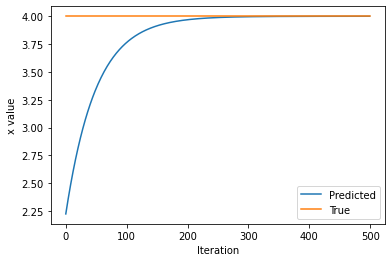

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Function minimization with automatic differentiation and SGD

# Initiate a randow value for our initial x
x = tf.Variable([tf.random.normal([1])])
print(f"Initializing x = {x.numpy()}")

learning_rate = 1e-2 # learning rate for SGD that is 1*10^-2 == 0.01
history = []
# Define the target value
x_f = 4

# we will run SGD for a number of iterations. At each iteration, we compute the loss,
# compute the derivate of the loss with respect to x, and perform the SGD update.
for i in range(500) :
  with tf.GradientTape() as tape:
    loss = (x - x_f)**2 #"forward pass": record the current loss on the tape
    grad = tape.gradient(loss, x) #Compute the derivative of the loss with respect to x
    new_x = x - learning_rate*grad #sgd update
    x.assign(new_x) #update the value of x
    history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towars x_f!

plt.plot(history)
plt.plot([0,500],[x_f,x_f])
plt.legend(('Predicted','True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
